We then wanted to solve the same problem for quartic polynomials. Quartic polynomials can have either 0 to 4 real roots, depending again on the discriminant. The method for discriminant analysis is more nuanced as it relies on both the sign as well as a few other numbers generated from the coefficients.
The process used can be found [here](https://en.wikipedia.org/wiki/Quartic_function#Nature_of_the_roots).

We then wanted to solve the same problem for quartic polynomials. Quartic polynomials can have either 0 to 4 real roots, depending again on the discriminant.

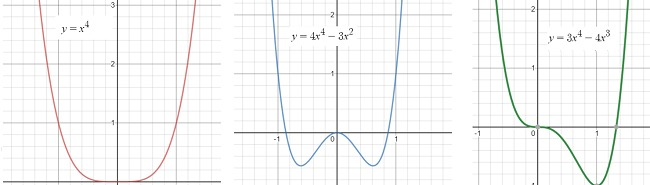

In [1]:
import numpy as np
import math
import random
ITERATIONS = 100000

In [2]:
# Random number generator that gives a number from a Gaussian distribution centered at 0 with a standard deviation of 1
def get_random():
    x = np.random.normal()
    return x

In [3]:
def quartic_discriminant(a,b,c,d,e):
    return 256*a**3*e**3 - 192*a**2*b*d*e**2 - 128*a**2*c**2*e**2 + 144*a**2*c*d**2*e - 27*a**2*d**4 + 144*a*b**2*c*e**2 \
        - 6*a*b**2*d**2*e - 80*a*b*c**2*d*e + 18*a*b*c*d**3 + 16*a*c**4*e - 4*a*c**3*d**2 - 27*b**4*e**2 + 18*b**3*c*d*e \
        - 4*b**3*d**3 - 4*b**2*c**3*e + b**2*c**2*d**2

def get_quartic_percentages():
    trz = 0
    frz = 0
    nrz = 0
    double_roots = 0
    triple_roots = 0
    quad_roots = 0
    for _ in range(ITERATIONS):
        a = get_random()
        b = get_random()
        c = get_random()
        d = get_random()
        e = get_random()
        disc = quartic_discriminant(a,b,c,d,e)
        P = 8*a*c - 3*b**2
        R = b**3 + 8*d*a**2 - 4*a*b*c
        Q = c**2 - 3*b*d + 12*a*e
        D = 64*a**3*e - 16*a**2*c**2 + 16*a*b**2*c - 16*a**2*b*d - 3*b**4
        if disc < 0:
            trz += 1
        elif disc > 0:
            if P<0 and D<0:
                frz += 1
            elif P>0 or D>0:
                nrz += 1
        elif disc == 0:
            if P<0 and D<0 and Q != 0:
                frz += 1
                double_roots += 1
            elif D>0 or (P>0 and D!=0 and R!=0):
                trz += 1
                double_roots += 1
            elif Q == 0 and D != 0:
                frz += 1
                triple_roots += 1
            elif D == 0:
                if P<0:
                    frz += 1
                    double_roots += 1
                elif P>0 and R==0:
                    nrz += 1
                    double_roots += 1
                elif Q == 0:
                    quad_roots += 1
                    frz += 1
    trz /= ITERATIONS
    nrz /= ITERATIONS
    frz /= ITERATIONS
    return nrz, trz, frz, double_roots, triple_roots, quad_roots


In [4]:
g = get_quartic_percentages()
nrz = round(g[0]*100,4)
trz = round(g[1]*100,4)
frz = round(g[2]*100,4)
double = g[3]
triple = g[4]
quad = g[5]
print("The average relative percentages of real roots for a quartic equation with randomly generated coefficients are:")
print(f"Average four real: {frz}%")
print(f"Average two real: {trz}%")
print(f"Average no real: {nrz}%")
print(f"Across {ITERATIONS} iterations there were:")
print(f"{double} equations with double roots")
print(f"{triple} equations with triple roots")
print(f"{quad} equations with quadruple roots")

The average relative percentages of real roots for a quartic equation with randomly generated coefficients are:
Average four real: 5.253%
Average two real: 71.513%
Average no real: 23.234%
Across 100000 iterations there were:
0 equations with double roots
0 equations with triple roots
0 equations with quadruple roots
